# CASE STUDY: IRIS PLANT CLASSIFICATION USING K-NEAREST NEIGHBORS





# STEP #0: PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features:
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes represneting class label of iris flower {1,2,3}
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica




In [2]:
!pip install joblib==1.1.1


In [4]:
import joblib 

In [5]:
print(joblib.__version__)


1.1.1


In [6]:
pip install scikit-learn==1.0

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# STEP #1: IMPORTING DATA

In [10]:
iris_data = pd.read_csv("iris.csv")

# STEP #2: EXPLORING THE DATASET  

In [11]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# Let's view the head of the training dataset
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# Let's view the last elements in the training dataset
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [14]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

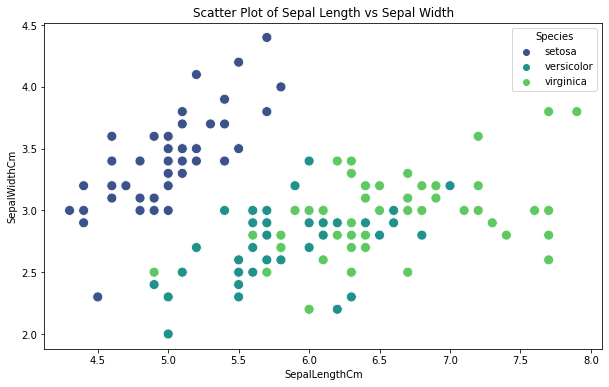

In [16]:
# Load the Iris dataset
iris_data = sns.load_dataset('iris')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_data, palette='viridis', s=100, edgecolor='w')

# Add labels and title
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.legend(title='Species')

# Display the plot
plt.show()


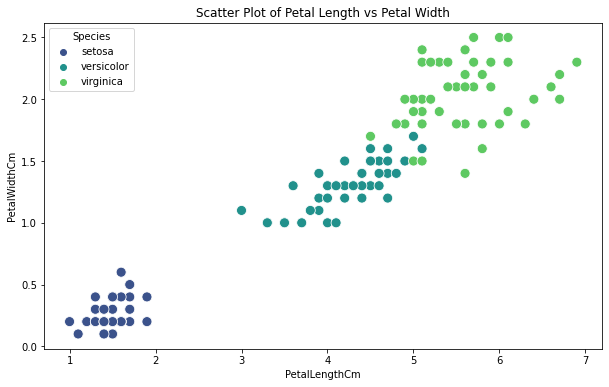

In [17]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_data, palette='viridis', s=100)

# Add labels and title
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.legend(title='Species')

# Display the plot
plt.show()


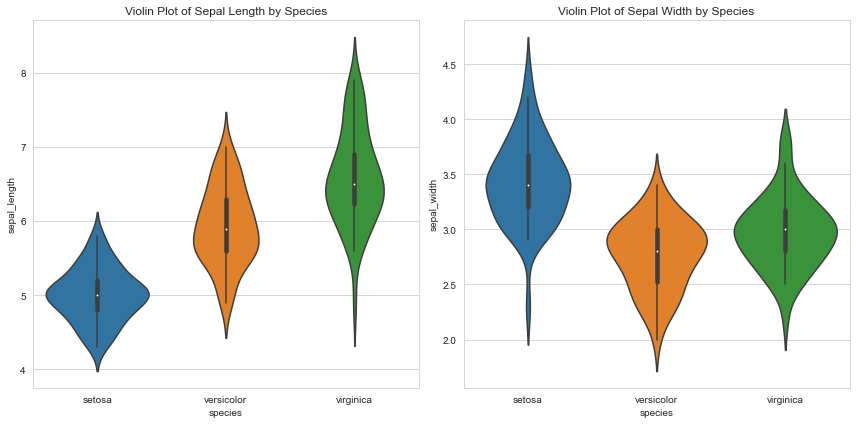

In [18]:
# Let's show the Violin plot

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating the violin plot for Sepal Length and Sepal Width, separated by Species
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='species', y='sepal_length', data=iris_data)
plt.title('Violin Plot of Sepal Length by Species')

plt.subplot(1, 2, 2)
sns.violinplot(x='species', y='sepal_width', data=iris_data)
plt.title('Violin Plot of Sepal Width by Species')

plt.tight_layout()
plt.show()



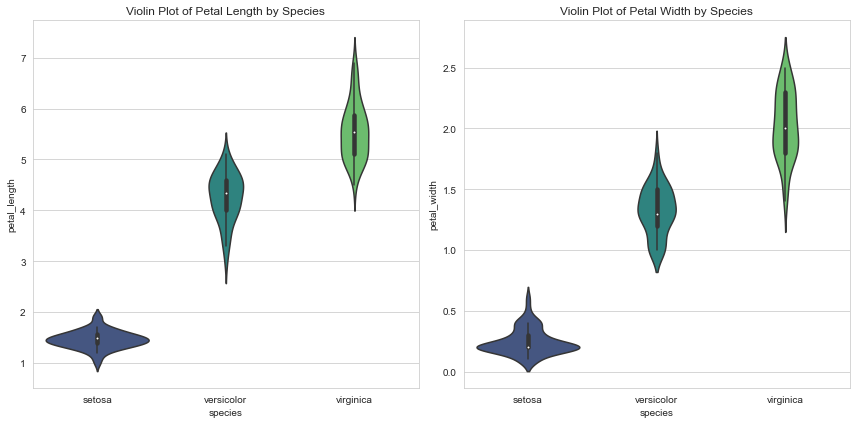

In [19]:
# Let's show the Violin plot

import seaborn as sns
import matplotlib.pyplot as plt
# Creating the violin plots for Petal Length and Petal Width, separated by Species
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='species', y='petal_length', data=iris_data, palette='viridis')
plt.title('Violin Plot of Petal Length by Species')

plt.subplot(1, 2, 2)
sns.violinplot(x='species', y='petal_width', data=iris_data, palette='viridis')
plt.title('Violin Plot of Petal Width by Species')

plt.tight_layout()
plt.show()


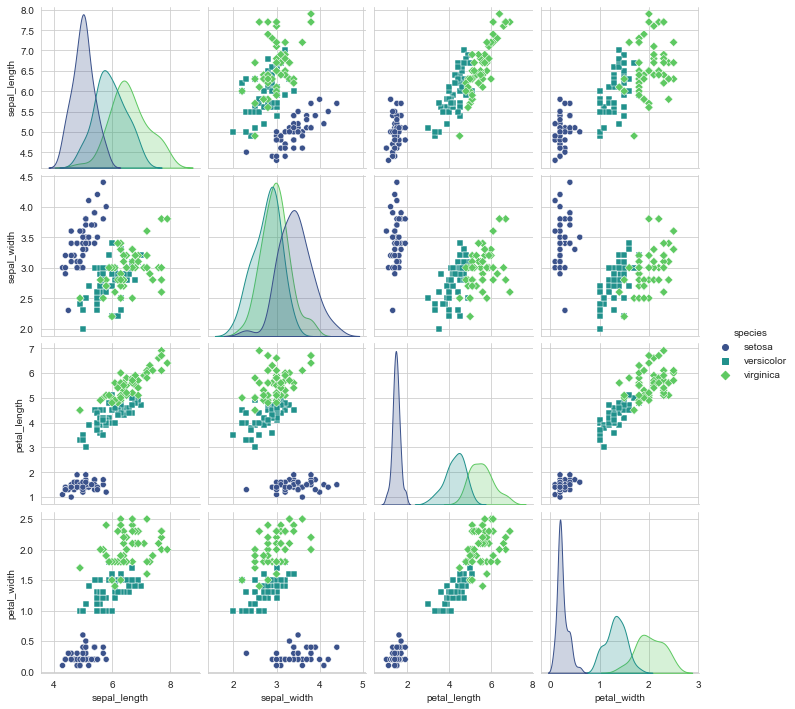

In [20]:
# Creating a pairplot using seaborn, with different colors for each species
sns.pairplot(iris_data, hue='species', palette='viridis', markers=["o", "s", "D"])

# Displaying the plot
plt.show()


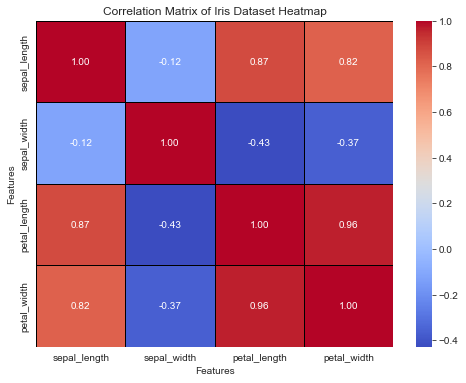

In [21]:
# Let's check the correlation between the variables
correlation_matrix = iris_data.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Iris Dataset Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


# STEP #3: DATA CLEANING

In [27]:
# Let's drop the ID and Species (target label) coloumns
iris_data_cleaned = iris_data.drop(columns=[ 'species'])
iris_data_cleaned

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
iris_data_label= iris_data[['species']]

In [29]:
iris_data_label

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [30]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X = iris_data_cleaned
y = iris_data_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.64, random_state=101)

In [31]:
y_train.shape

(54, 1)

In [32]:
X_test.shape

(96, 4)

In [33]:
X_train.shape

(54, 4)

In [34]:
X_train.head(5)

,sepal_length,sepal_width,petal_length,petal_width
119,6.0,2.2,5.0,1.5
128,6.4,2.8,5.6,2.1
15,5.7,4.4,1.5,0.4
71,6.1,2.8,4.0,1.3
18,5.7,3.8,1.7,0.3


In [35]:
y_train.head()

,species
119,virginica
128,virginica
15,setosa
71,versicolor
18,setosa


# STEP #4: TRAINING THE MODEL

In [41]:
from sklearn.neighbors import KNeighborsClassifier

iris_knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [42]:

# Then fit the model
iris_knn_classifier.fit(X_train, y_train)


/Users/reemalmaamari/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

# STEP #5: EVALUATING THE MODEL

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
predictions = iris_knn_classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       0.89      0.97      0.93        33
   virginica       0.96      0.86      0.91        28

    accuracy                           0.95        96
   macro avg       0.95      0.94      0.94        96
weighted avg       0.95      0.95      0.95        96



/Users/reemalmaamari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


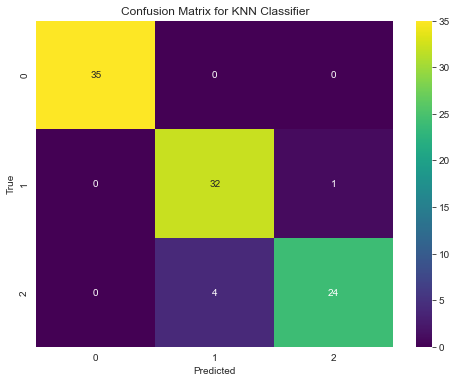

In [45]:
# Importing necessary libraries for the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Creating the heatmap with the 'viridis' colormap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [46]:
from joblib import dump

# Assume `model` is your trained model
dump(iris_knn_classifier, 'iris3.joblib')


['iris3.joblib']

In [65]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [66]:
# For Pandas
import pandas as pd
print(pd.__version__)

# For NumPy
import numpy as np
print(np.__version__)

# For Matplotlib
import matplotlib
print(matplotlib.__version__)

# For Seaborn
import seaborn as sns
print(sns.__version__)

# For scikit-learn
import sklearn
print(sklearn.__version__)

import joblib
print(joblib.__version__)

1.4.2
1.21.5
3.5.1
0.11.2
1.0
1.3.2


In [48]:
import altair as alt
print(alt.__version__)


5.1.2


In [1]:
which python


SyntaxError: invalid syntax (1817364949.py, line 1)

In [2]:
import sys
print(sys.executable)


/Users/reemalmaamari/opt/anaconda3/bin/python


In [3]:
conda list scikit-learn


# packages in environment at /Users/reemalmaamari/opt/anaconda3:
#
# Name                    Version                   Build  Channel
scikit-learn              1.1.1                    pypi_0    pypi
scikit-learn-intelex      2021.5.0         py39hecd8cb5_0  

Note: you may need to restart the kernel to use updated packages.


# packages in environment at /Users/reemalmaamari/opt/anaconda3:
#
# Name                    Version                   Build  Channel
streamlit                 1.11.0                   pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [6]:
conda uninstall protobuf

Solving environment: done

## Package Plan ##

  environment location: /Users/reemalmaamari/opt/anaconda3

  removed specs:
    - protobuf


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aiofiles-22.1.0            |   py39hecd8cb5_0          25 KB
    aiosqlite-0.18.0           |   py39hecd8cb5_0          35 KB
    anaconda-anon-usage-0.4.3  | py39hfb7c958_100          25 KB
    anaconda-client-1.12.1     |   py39hecd8cb5_0         154 KB
    anaconda-cloud-auth-0.1.4  |   py39hecd8cb5_0          31 KB
    anaconda-navigator-2.5.0   |   py39hecd8cb5_0         6.8 MB
    archspec-0.2.1             |     pyhd3eb1b0_0          39 KB
    attrs-23.1.0               |   py39hecd8cb5_0         144 KB
    babel-2.11.0               |   py39hecd8cb5_0         6.8 MB
    beautifulsoup4-4.12.2      |   py39hecd8cb5_0         215 KB
    boltons-23.0.0             |   py39hecd8cb5_0         423 KB


In [7]:
conda install protobuf


Note: you may need to restart the kernel to use updated packages.


In [8]:
conda update -n base -c defaults conda



Note: you may need to restart the kernel to use updated packages.
